# Predictive Ordering: Generate Synthetic Data

---
This notebook contains the code to demonstrate how monthly historical order data can be used to predict future demand. The algorithm generates the following input quantities that will be used by subsequent machine learning models:
* Historical order quantity
* Out of stock information
* Product expiration
* Remaining inventory
* Monthly visit cadence (To do)
---

## Creating the Synthetic Data

Importing the required libraries

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

Creating a series to simulate the monthly historical order quantities for the last 5 years

In [128]:
years = 5
shortProductNames = ["Diet Pepsi", "Frito Lays", "Quaker Oats", "Ruffles", "Tropican Orange", "Mountain Dew"]
products = len(shortProductNames)
month = np.arange(12 * years, dtype="float")

### Simulating a Trend

Defining a function to simulate the trend

In [129]:
def trend(series, slope, intercept):
  return series * slope + intercept

Calling the trend function several times to create the monthly order quantities that follow a predefined trend

In [130]:
# Initialize random slopes and random y-intercepts
slope, intercept = (np.random.rand(products) * 2) - 0.75, np.random.rand(products) * 100

print("Slope: ", slope)
print("Y intercept: ", intercept)

historicalOrder1 = trend(month, slope[0], intercept[0])
historicalOrder2 = trend(month, slope[1], intercept[1])
historicalOrder3 = trend(month, slope[2], intercept[2])
historicalOrder4 = trend(month, slope[3], intercept[3])
historicalOrder5 = trend(month, slope[4], intercept[4])
historicalOrder6 = trend(month, slope[5], intercept[5])

Slope:  [ 0.79734228 -0.41541223 -0.73716381 -0.48293984 -0.57910637 -0.41351063]
Y intercept:  [11.00673113 16.19326725 91.90945393 43.06385117 51.28456989 83.36443047]


Ploting the monthly order quantities that we have generated with a trend

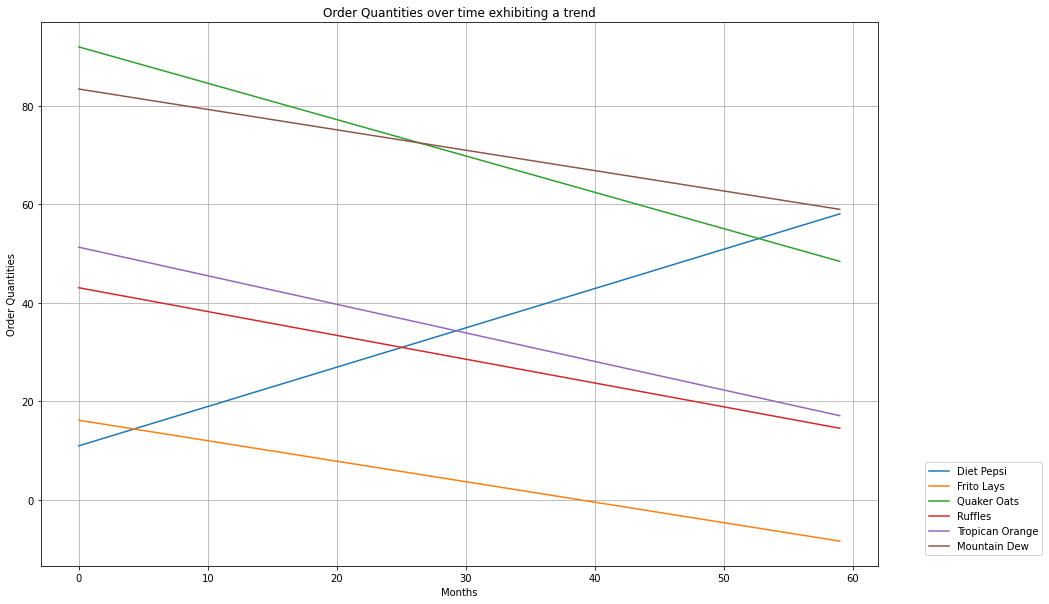

In [131]:
plt.figure(figsize=(15, 10))
plt.title("Order Quantities over time exhibiting a trend")

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Months")
    plt.ylabel("Order Quantities")
    plt.legend(shortProductNames, loc="upper left", bbox_to_anchor=(1.05, 0.0, 0.3, 0.2))
    plt.grid(True)

plot_series(month, historicalOrder1)
plot_series(month, historicalOrder2)
plot_series(month, historicalOrder3)
plot_series(month, historicalOrder4)
plot_series(month, historicalOrder5)
plot_series(month, historicalOrder6)

### Simulating Seasonality

Defining a function to simulate the seasonality

In [132]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

Combining the trend and the seasonality function so that our data exhibits seasonality

In [133]:
period = np.random.randint(4, size=products) + 1
amplitude = np.random.rand(products) * 40

print("Period: ", period)
print("Amplitude: ", amplitude)

historicalOrder1 += seasonality(historicalOrder1, period=period[0], amplitude=amplitude[0])
historicalOrder2 += seasonality(historicalOrder2, period=period[1], amplitude=amplitude[1])
historicalOrder3 += seasonality(historicalOrder3, period=period[2], amplitude=amplitude[2])
historicalOrder4 += seasonality(historicalOrder1, period=period[3], amplitude=amplitude[3])
historicalOrder5 += seasonality(historicalOrder2, period=period[4], amplitude=amplitude[4])
historicalOrder6 += seasonality(historicalOrder3, period=period[5], amplitude=amplitude[5])

Period:  [4 4 2 2 3 3]
Amplitude:  [37.10294631 12.37317795 34.99135696 12.06993872 27.17893591  5.40498126]


Ploting the monthly order quantities that we have generated with a trend and seasonality

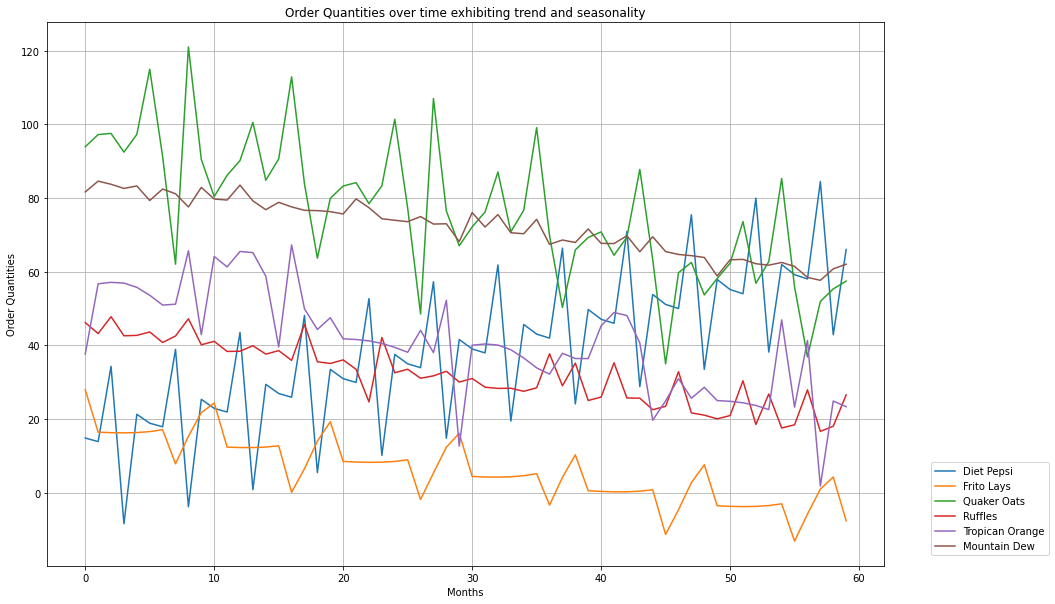

In [134]:
plt.figure(figsize=(15, 10))
plt.title("Order Quantities over time exhibiting trend and seasonality")

plot_series(month, historicalOrder1)
plot_series(month, historicalOrder2)
plot_series(month, historicalOrder3)
plot_series(month, historicalOrder4)
plot_series(month, historicalOrder5)
plot_series(month, historicalOrder6)

### Simulating Noise

Defining a function to simulate the noise

In [135]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

Combining the noise to the trend and the seasonality function so that our data exhibits noise

In [136]:
noise_level = np.random.randint(4, size=products) + 1

print("Noise: ", noise_level)

historicalOrder1 += noise(historicalOrder1, noise_level[0], seed=42)
historicalOrder2 += noise(historicalOrder1, noise_level[1], seed=42)
historicalOrder3 += noise(historicalOrder1, noise_level[2], seed=42)
historicalOrder4 += noise(historicalOrder1, noise_level[3], seed=42)
historicalOrder5 += noise(historicalOrder1, noise_level[4], seed=42)
historicalOrder6 += noise(historicalOrder1, noise_level[5], seed=42)

Noise:  [3 4 1 2 2 3]


Convert the series to integer

In [137]:
historicalOrder1 = historicalOrder1.astype(int)
historicalOrder2 = historicalOrder2.astype(int)
historicalOrder3 = historicalOrder3.astype(int)
historicalOrder4 = historicalOrder4.astype(int)
historicalOrder5 = historicalOrder5.astype(int)
historicalOrder6 = historicalOrder6.astype(int)

Negative order quantities are not possible so floor all negative values to 0

In [138]:
historicalOrder1 = np.array([0 if order < 0 else order for order in historicalOrder1])
historicalOrder2 = np.array([0 if order < 0 else order for order in historicalOrder3])
historicalOrder3 = np.array([0 if order < 0 else order for order in historicalOrder3])
historicalOrder4 = np.array([0 if order < 0 else order for order in historicalOrder4])
historicalOrder5 = np.array([0 if order < 0 else order for order in historicalOrder5])
historicalOrder6 = np.array([0 if order < 0 else order for order in historicalOrder6])

Ploting the monthly order quantities that we have generated with a trend, seasonality and noise

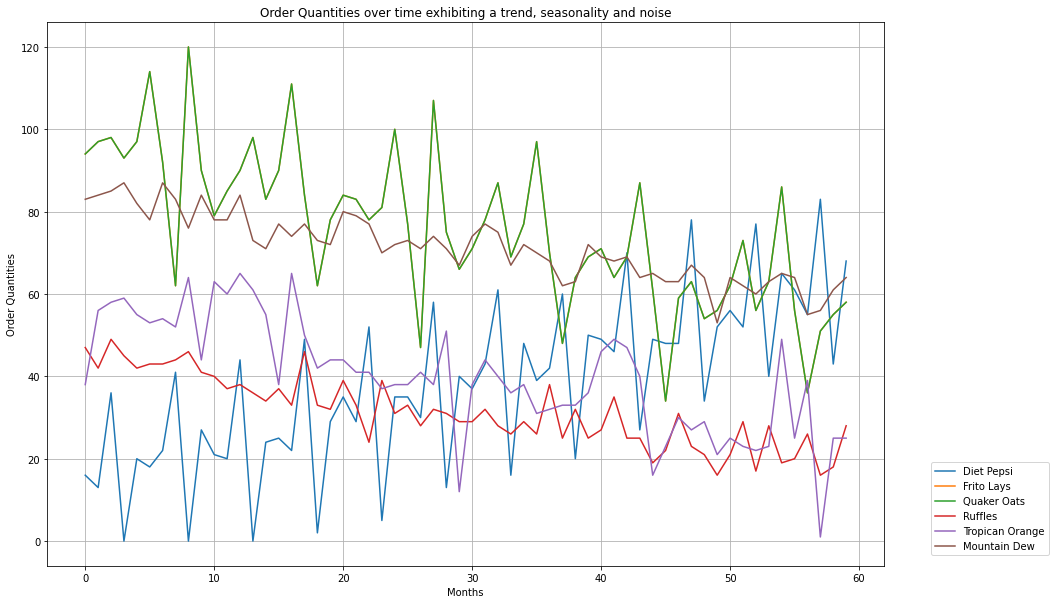

In [139]:
plt.figure(figsize=(15, 10))
plt.title("Order Quantities over time exhibiting a trend, seasonality and noise")

plot_series(month, historicalOrder1)
plot_series(month, historicalOrder2)
plot_series(month, historicalOrder3)
plot_series(month, historicalOrder4)
plot_series(month, historicalOrder5)
plot_series(month, historicalOrder6)

### Simulating the Out of Stock Data

In [140]:
outOfStockTimePeriod = np.random.randint(4, 10, size=products)

print("Out of stock time period: ", outOfStockTimePeriod)

outOfStock1 = [True if number % outOfStockTimePeriod[0] == 0 else False  for number in np.random.randint(0, 100, size=years*12)]
outOfStock2 = [True if number % outOfStockTimePeriod[1] == 0 else False  for number in np.random.randint(0, 100, size=years*12)]
outOfStock3 = [True if number % outOfStockTimePeriod[2] == 0 else False  for number in np.random.randint(0, 100, size=years*12)]
outOfStock4 = [True if number % outOfStockTimePeriod[3] == 0 else False  for number in np.random.randint(0, 100, size=years*12)]
outOfStock5 = [True if number % outOfStockTimePeriod[4] == 0 else False  for number in np.random.randint(0, 100, size=years*12)]
outOfStock6 = [True if number % outOfStockTimePeriod[5] == 0 else False  for number in np.random.randint(0, 100, size=years*12)]

Out of stock time period:  [6 4 8 9 8 4]


### Simulating the Expired Products

Randomly generating the time periods during which products expire for each of  the 6 products we have

In [141]:
expiredProductsTimePeriod = np.random.randint(1, 4, size=products)

print("Expired Products Time Period: ", expiredProductsTimePeriod)

Expired Products Time Period:  [3 3 3 2 1 3]


Randomly generating the expired quantities for each product

In [142]:
expired1 = [int(np.random.random() * 10) if number % expiredProductsTimePeriod[0] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
expired2 = [int(np.random.random() * 10) if number % expiredProductsTimePeriod[1] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
expired3 = [int(np.random.random() * 10) if number % expiredProductsTimePeriod[2] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
expired4 = [int(np.random.random() * 10) if number % expiredProductsTimePeriod[3] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
expired5 = [int(np.random.random() * 10) if number % expiredProductsTimePeriod[4] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
expired6 = [int(np.random.random() * 10) if number % expiredProductsTimePeriod[5] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]

### Simulating the Remaining inventory

:Randomly generating the time periods during which products have a remaining inventory

In [143]:
remainingInventoryTimePeriod = np.random.randint(1, 4, size=products)

print("Remaining Inventory Time Period: ", remainingInventoryTimePeriod)

Remaining Inventory Time Period:  [2 3 2 2 3 3]


Randomly generating the expired quantities for each product

In [144]:
remainingInventory1 = [int(np.random.random() * 10) if number % remainingInventoryTimePeriod[0] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
remainingInventory2 = [int(np.random.random() * 10) if number % remainingInventoryTimePeriod[1] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
remainingInventory3 = [int(np.random.random() * 10) if number % remainingInventoryTimePeriod[2] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
remainingInventory4 = [int(np.random.random() * 10) if number % remainingInventoryTimePeriod[3] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
remainingInventory5 = [int(np.random.random() * 10) if number % remainingInventoryTimePeriod[4] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]
remainingInventory6 = [int(np.random.random() * 10) if number % remainingInventoryTimePeriod[5] == 0 else 0 for number in np.random.randint(0, 100, size=years*12)]

## Displaying and Exporting the Synthetic Data

Creating the dataframe to store the synthetic data

In [145]:
df = pd.DataFrame({
    "HistoricalOrder1": historicalOrder1,
    "OutOfStock1": outOfStock1,
    "ProductsExpired1": expired1,
    "RemainingInventory1": remainingInventory1,

    "HistoricalOrder2": historicalOrder2,
    "OutOfStock2": outOfStock2,
    "ProductsExpired2": expired2,
    "RemainingInventory2": remainingInventory2,

    "HistoricalOrder3": historicalOrder3,
    "OutOfStock3": outOfStock3,
    "ProductsExpired3": expired3,
    "RemainingInventory3": remainingInventory3,
    
    "HistoricalOrder4": historicalOrder4,
    "OutOfStock4": outOfStock4,
    "ProductsExpired4": expired4,
    "RemainingInventory4": remainingInventory4,
    
    "HistoricalOrder5": historicalOrder5,
    "OutOfStock5": outOfStock5,
    "ProductsExpired5": expired5,
    "RemainingInventory5": remainingInventory5,
    
    "HistoricalOrder6": historicalOrder6,
    "OutOfStock6": outOfStock6,
    "ProductsExpired6": expired6,
    "RemainingInventory6": remainingInventory6})

In [146]:
df

,HistoricalOrder1,OutOfStock1,ProductsExpired1,RemainingInventory1,HistoricalOrder2,OutOfStock2,ProductsExpired2,RemainingInventory2,HistoricalOrder3,OutOfStock3,ProductsExpired3,RemainingInventory3,HistoricalOrder4,OutOfStock4,ProductsExpired4,RemainingInventory4,HistoricalOrder5,OutOfStock5,ProductsExpired5,RemainingInventory5,HistoricalOrder6,OutOfStock6,ProductsExpired6,RemainingInventory6
0,16,False,3,7,94,True,0,0,94,False,0,0,47,False,0,0,38,False,2,0,83,False,6,0
1,13,False,6,7,97,False,0,0,97,False,0,5,42,False,0,0,56,False,6,0,84,True,0,0
2,36,False,0,8,98,False,2,4,98,False,0,0,49,False,0,2,58,False,3,2,85,True,0,0
3,0,True,0,0,93,True,3,0,93,True,0,0,45,False,0,2,59,False,4,0,87,False,0,4
4,20,False,0,0,97,False,0,0,97,False,0,0,42,False,0,0,55,False,9,6,82,False,0,9
5,18,False,0,0,114,False,0,0,114,True,1,0,43,False,0,5,53,False,0,0,78,False,0,4
6,22,True,0,2,92,False,5,2,92,False,0,6,43,False,2,9,54,False,1,0,87,False,0,2
7,41,False,7,2,62,False,0,9,62,False,0,0,44,False,8,7,52,False,3,0,83,False,6,0
8,0,False,0,0,120,False,7,6,120,False,0,0,46,False,0,0,64,False,7,0,76,False,6,0
9,27,False,0,9,90,False,0,0,90,False,0,7,41,False,4,0,44,False,1,0,84,True,0,2


Export the data frame as a csv

In [147]:
drive.mount("drive")

df.to_csv("Orders.csv")
!cp Orders.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
